# Requirements

In [4]:
from statistics import correlation

# Add as many imports as you need.
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [5]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('datasets/spotify_songs.csv')

In [6]:
df

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN       NaN       0.1090      0.007920   
32832         0.603   0.884    -4.571          NaN      0.000133   

       instrumentalness  liveness  valence    tempo genre  
0              0.000000    0.0653   0.5180  122.036   pop  
1                   NaN    0.3570   0.6930   99.972   pop  
2                   NaN    0.1100   0.6130  124.008   pop  
3              0.000009    0.2040   0.2770      NaN   pop  
4              0.000000    0.0833   0.7250  123.976   pop  
...                 ...       ...      ...      ...   ...  
32828          0.000000    0.0668   0.2100  128.170   edm  
32829          0.004270    0.3750   0.4000  128.041   edm  
32830               NaN    0.1500   0.4360  127.989   edm  
32831          0.127000    0.3430   0.3080  128.008   edm  
32832               NaN    0.7420   0.0894  127.984   edm  

[32833 rows x 10 columns]

Preprocess the input and the output variables appropriately.

In [7]:
# Write your code here. Add as many boxes as you need.
x = df.drop(columns='genre')
y = df['genre']

In [8]:
x

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN       NaN       0.1090      0.007920   
32832         0.603   0.884    -4.571          NaN      0.000133   

       instrumentalness  liveness  valence    tempo  
0              0.000000    0.0653   0.5180  122.036  
1                   NaN    0.3570   0.6930   99.972  
2                   NaN    0.1100   0.6130  124.008  
3              0.000009    0.2040   0.2770      NaN  
4              0.000000    0.0833   0.7250  123.976  
...                 ...       ...      ...      ...  
32828          0.000000    0.0668   0.2100  128.170  
32829          0.004270    0.3750   0.4000  128.041  
32830               NaN    0.1500   0.4360  127.989  
32831          0.127000    0.3430   0.3080  128.008  
32832               NaN    0.7420   0.0894  127.984  

[32833 rows x 9 columns]

In [9]:
y

0        pop
1        pop
2        pop
3        pop
4        pop
        ... 
32828    edm
32829    edm
32830    edm
32831    edm
32832    edm
Name: genre, Length: 32833, dtype: object

In [10]:
y.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

Explore the dataset using visualizations of your choice.

In [11]:
df['genre'].value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

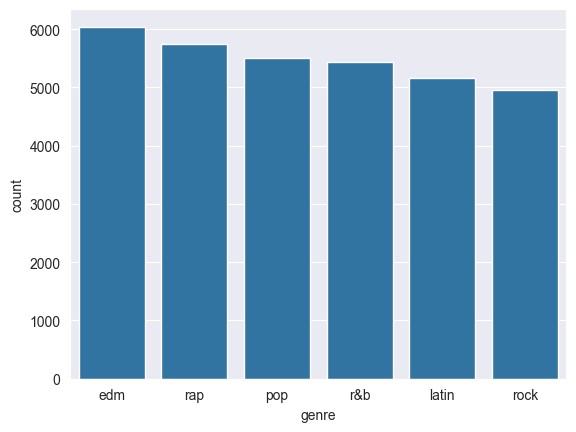

In [12]:
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.show()

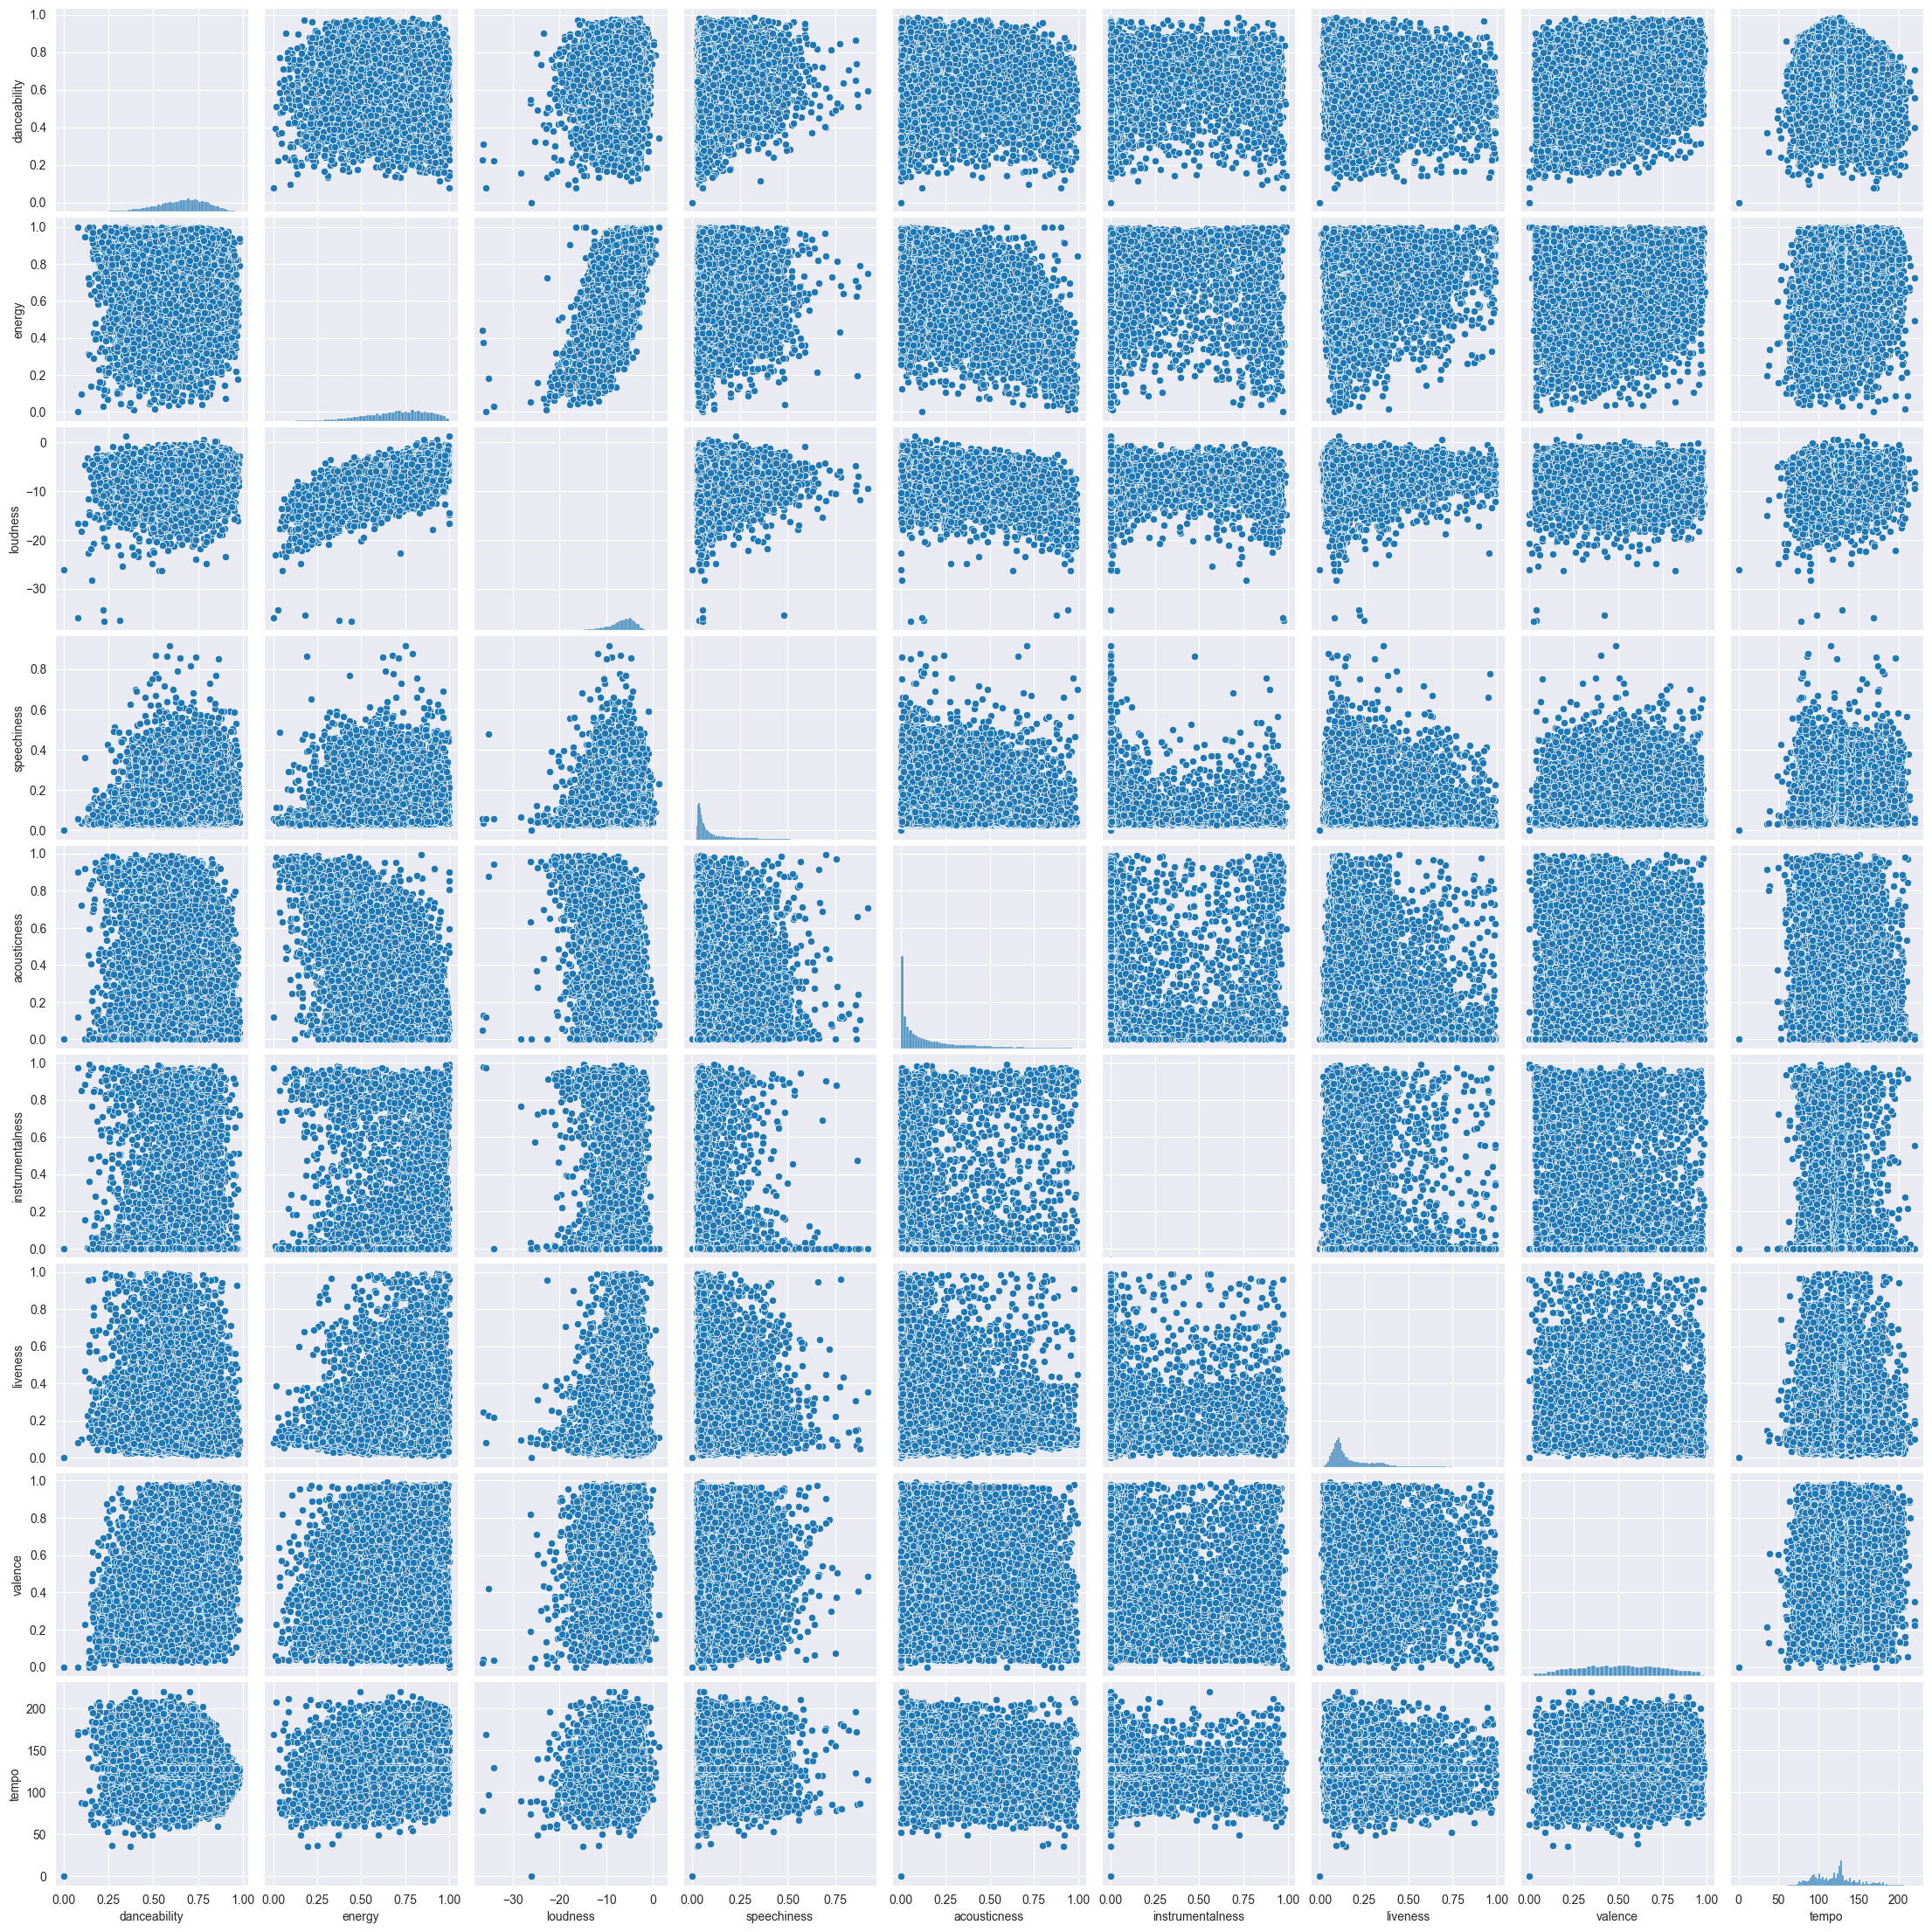

In [13]:
sns.pairplot(df)

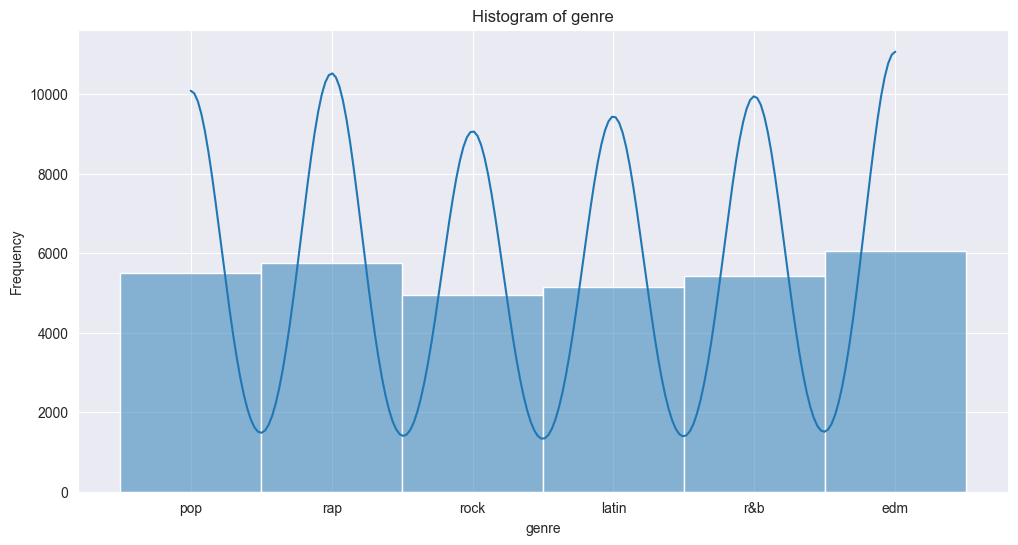

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df['genre'], kde=True)
plt.title("Histogram of genre")
plt.xlabel("genre")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Write your code here. Add as many boxes as you need.

Check if the dataset is balanced.

In [16]:
# Write your code here. Add as many boxes as you need.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [17]:
# Write your code here. Add as many boxes as you need.
missing_values_percentage = df.isnull().sum() / len(df)
missing_values_percentage * 100

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

# Correlation 

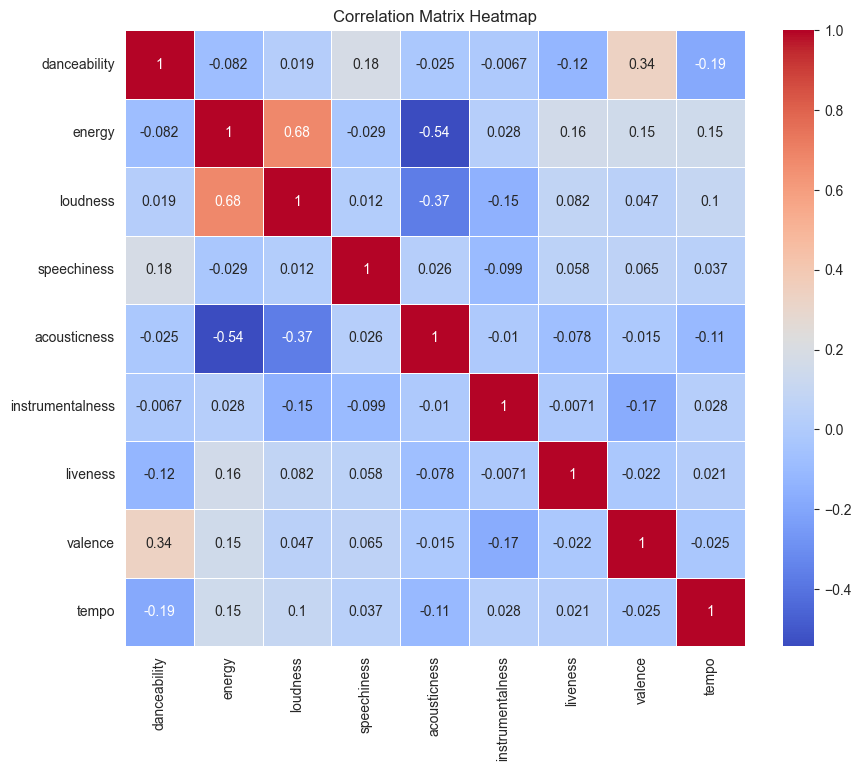

In [18]:
correlation_matrix = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=0.5 )
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

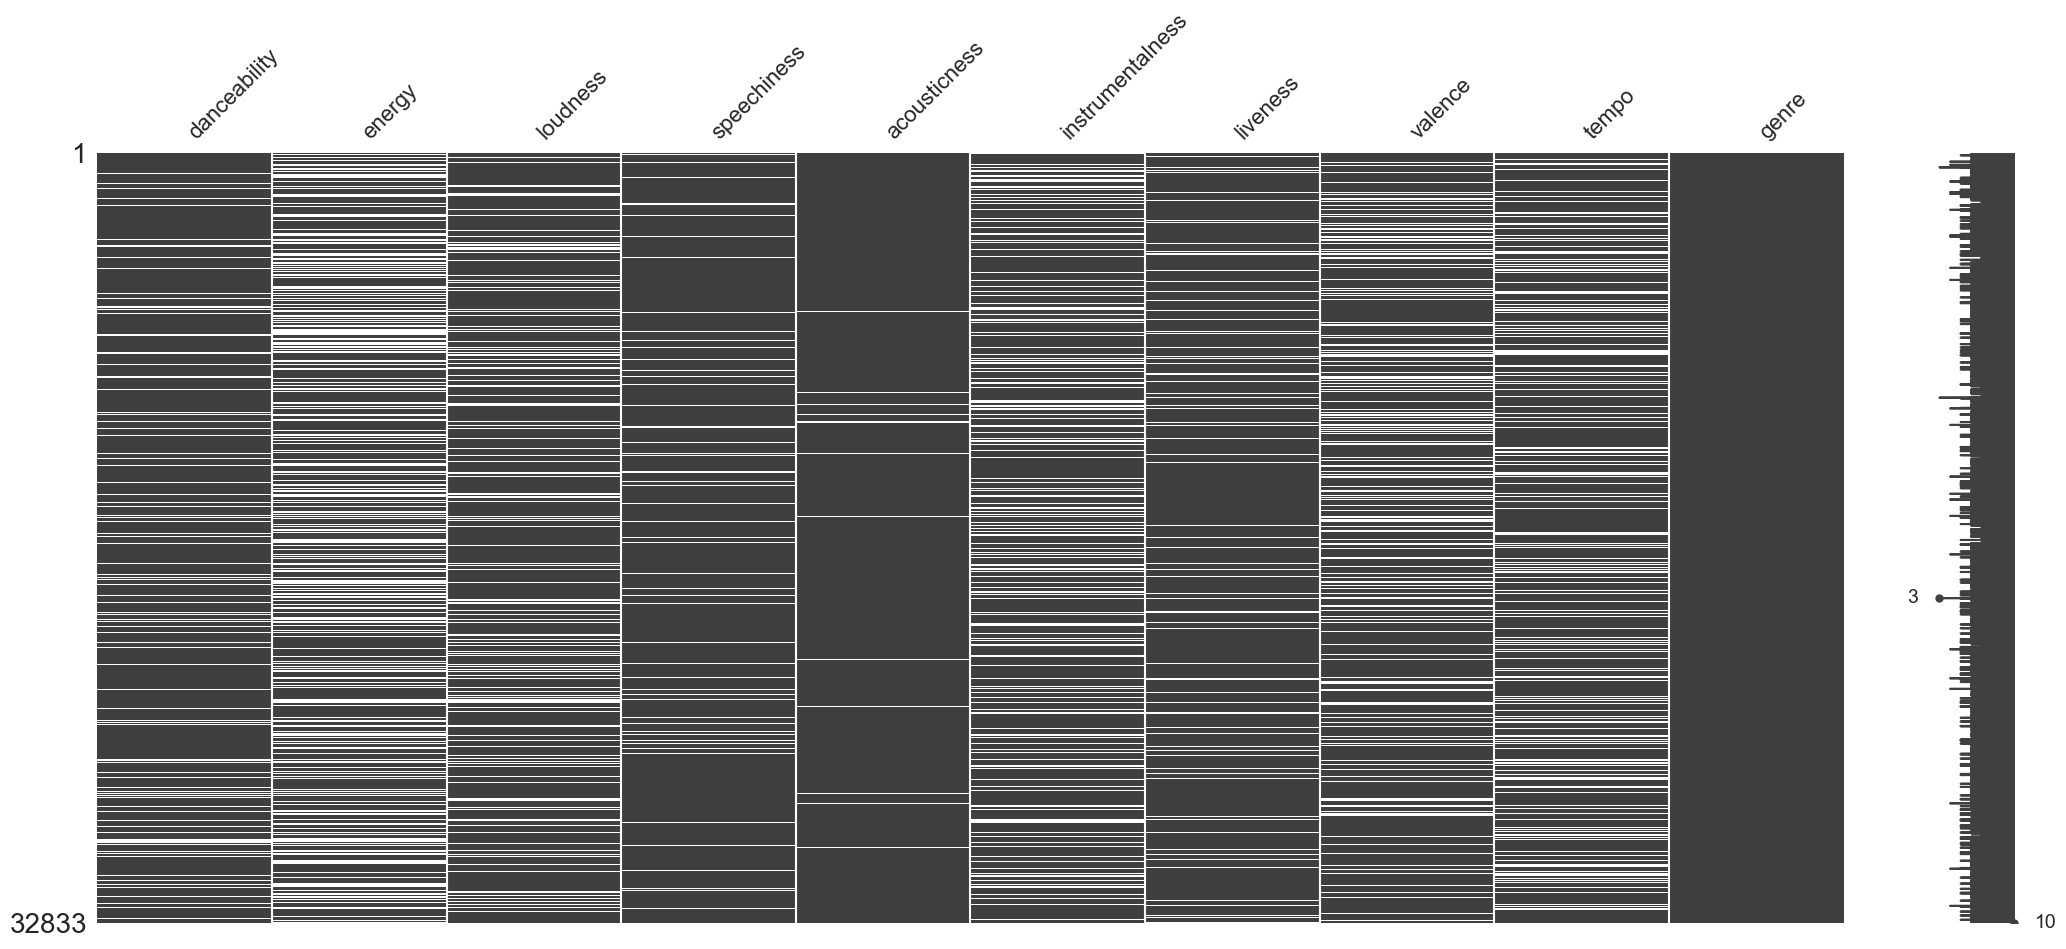

In [19]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [20]:
# Write your code here. Add as many boxes as you need.
df

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN       NaN       0.1090      0.007920   
32832         0.603   0.884    -4.571          NaN      0.000133   

       instrumentalness  liveness  valence    tempo genre  
0              0.000000    0.0653   0.5180  122.036   pop  
1                   NaN    0.3570   0.6930   99.972   pop  
2                   NaN    0.1100   0.6130  124.008   pop  
3              0.000009    0.2040   0.2770      NaN   pop  
4              0.000000    0.0833   0.7250  123.976   pop  
...                 ...       ...      ...      ...   ...  
32828          0.000000    0.0668   0.2100  128.170   edm  
32829          0.004270    0.3750   0.4000  128.041   edm  
32830               NaN    0.1500   0.4360  127.989   edm  
32831          0.127000    0.3430   0.3080  128.008   edm  
32832               NaN    0.7420   0.0894  127.984   edm  

[32833 rows x 10 columns]

In [21]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

df['acousticness'] = mean_imputer.fit_transform(df[['acousticness']])
df['speechiness'] = mean_imputer.fit_transform(df[['speechiness']])
df['liveness'] = mean_imputer.fit_transform(df[['liveness']])

df['danceability'] = median_imputer.fit_transform(df[['danceability']])

KNN imputing 

In [22]:
knn_imputer = KNNImputer(n_neighbors=5)

df['tempo'] = knn_imputer.fit_transform(df[['tempo']])
df['valence'] = knn_imputer.fit_transform(df[['valence']])
df['instrumentalness'] = knn_imputer.fit_transform(df[['instrumentalness']])

loudness and energy are highly correlated - 0.68, which means that i need to use MICE to impute values 

In [23]:
iterative_imputer = IterativeImputer()

df['loudness'] = iterative_imputer.fit_transform(df[['loudness']])
df['energy'] = iterative_imputer.fit_transform(df[['energy']])

In [24]:
df.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [25]:
df

danceability    energy  loudness  speechiness  acousticness  \
0             0.748  0.916000 -2.634000     0.058300      0.102000   
1             0.726  0.697964 -4.969000     0.037300      0.072400   
2             0.675  0.931000 -3.432000     0.074200      0.079400   
3             0.718  0.930000 -3.778000     0.102000      0.028700   
4             0.650  0.833000 -4.672000     0.035900      0.080300   
...             ...       ...       ...          ...           ...   
32828         0.428  0.697964 -1.814000     0.093600      0.076600   
32829         0.522  0.786000 -4.462000     0.042000      0.001710   
32830         0.529  0.821000 -4.899000     0.048100      0.108000   
32831         0.626  0.697964 -6.700534     0.109000      0.007920   
32832         0.603  0.884000 -4.571000     0.107035      0.000133   

       instrumentalness  liveness  valence       tempo genre  
0              0.000000    0.0653   0.5180  122.036000   pop  
1              0.083894    0.3570   0.6930   99.972000   pop  
2              0.083894    0.1100   0.6130  124.008000   pop  
3              0.000009    0.2040   0.2770  120.905999   pop  
4              0.000000    0.0833   0.7250  123.976000   pop  
...                 ...       ...      ...         ...   ...  
32828          0.000000    0.0668   0.2100  128.170000   edm  
32829          0.004270    0.3750   0.4000  128.041000   edm  
32830          0.083894    0.1500   0.4360  127.989000   edm  
32831          0.127000    0.3430   0.3080  128.008000   edm  
32832          0.083894    0.7420   0.0894  127.984000   edm  

[32833 rows x 10 columns]

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [26]:
# Write your code here. Add as many boxes as you need.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [27]:
# Write your code here. Add as many boxes as you need.
standard_scaler = StandardScaler()

x_scaled_train = standard_scaler.fit_transform(x_train)
x_scaled_test = standard_scaler.transform(x_test)

In [28]:
x_scaled_train

array([[-0.38357099,  1.05243626,         nan, ...,  0.5832571 ,
         1.38425624,  0.0062098 ],
       [-0.16332588, -0.55148922,  0.1894407 , ..., -0.61907419,
         0.92892749,         nan],
       [        nan, -0.34059245,  0.34425498, ..., -0.84678845,
         0.58957871,  1.81694275],
       ...,
       [        nan,  0.68614186,  0.73499274, ..., -0.61061623,
        -0.53585649,  1.1891613 ],
       [-0.12202992,         nan,         nan, ..., -0.75570275,
        -0.89668304,  0.36082878],
       [ 0.40793486,         nan, -1.87430087, ..., -0.36663667,
        -1.84170496, -0.62601272]])

In [29]:
x_scaled_test

array([[ 2.93885876e-02,  9.58087704e-01,  1.73320825e+00, ...,
         7.00367291e-01,  1.09215855e+00,  3.00171246e-01],
       [-1.78075087e+00,  2.25498901e-01,  4.37133558e-02, ...,
         1.10374684e+00, -7.42043089e-01,             nan],
       [ 9.44782308e-01,             nan, -2.18124698e-01, ...,
        -4.44710129e-01,  1.44868955e+00, -1.10287201e+00],
       ...,
       [ 1.25745821e-01,  1.11903524e+00, -7.03780328e-02, ...,
         2.24231813e+00,             nan, -1.06630248e-01],
       [-1.87900293e-02, -2.04762160e-03,             nan, ...,
        -6.62014594e-01, -1.75029936e-01, -9.20085200e-01],
       [-2.56726888e-02,  9.08138467e-01, -8.96278527e-01, ...,
         2.40497118e+00,  1.32841403e+00,             nan]])

In [30]:
encoder = LabelEncoder() # target feature - go enkodiram bidejki mi e klasifikacija - moram vo float da go enkodiram

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## Model Selection

Choose and train an approriate model for the given task.

In [31]:
# Write your code here. Add as many boxes as you need.
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(x_scaled_train, y_train_encoded)

RandomForestClassifier(random_state=42)

Use the trained model to make predictions for the test set.

In [32]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(x_scaled_test)

Assess the performance of the model by using different classification metrics.

In [33]:
# Write your code here. Add as many boxes as you need.
print(classification_report(y_test_encoded, y_pred))
print(accuracy_score(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1240
           1       0.43      0.38      0.40      1019
           2       0.36      0.28      0.31      1107
           3       0.39      0.39      0.39      1077
           4       0.54      0.63      0.58      1132
           5       0.60      0.68      0.64       992

    accuracy                           0.50      6567
   macro avg       0.49      0.50      0.49      6567
weighted avg       0.49      0.50      0.50      6567

0.5032739454850007


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [34]:
# Write your code here. Add as many boxes as you need.
x_train2, x_test2,  y_train2, y_test2= train_test_split(x, y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [35]:
# Write your code here. Add as many boxes as you need.
scaler2 = StandardScaler()

x_scaled_train2 = scaler2.fit_transform(x_train2)
x_scaled_test2 = scaler2.transform(x_test2)

In [36]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder ()
y_train2_encoded = encoder.fit_transform(y_train2)
y_test2_encoded = encoder.transform(y_test2)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [37]:
parameters_grid = { #parametrite od RandomForestClassifier
    'max_depth' : [3, 5],
    'n_estimators' : [100, 200],
    'criterion' : ['gini', 'entropy'],
}

grid_search = GridSearchCV(RandomForestClassifier(), parameters_grid, scoring='accuracy', cv=5)

grid_search.fit(x_scaled_train2, y_train2_encoded)
# tree2 = RandomForestClassifier()

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment

In [38]:
# Write your code here. Add as many boxes as you need.
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
0.4354460702493171


In [41]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_scaled_test2)

In [42]:
print(classification_report(y_test2_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.66      0.57       572
           1       0.35      0.38      0.37       503
           2       0.31      0.14      0.20       547
           3       0.39      0.24      0.29       557
           4       0.48      0.58      0.52       592
           5       0.47      0.63      0.54       513

    accuracy                           0.44      3284
   macro avg       0.42      0.44      0.41      3284
weighted avg       0.42      0.44      0.42      3284

